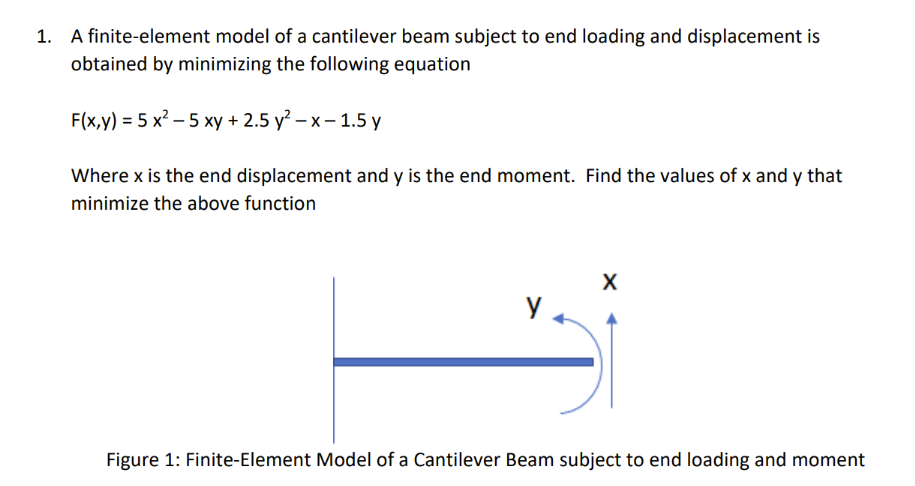

<font size='5'>Solution </font>

In [2]:
#Step 1: Load libraries 

import os 

from scipy.optimize import minimize 


#Step 3: Define function for mimizing 

def f(A): 

    z=5*A[0]**2-5*A[0]*A[1]+2.5*A[1]**2-A[0]-1.5*A[1] 

    return(z) 

 

#Step 4: Call minimizing functions 

init=(1,1)#Starting values for x an y 

values=minimize(f,init,method='Nelder-Mead')     
values

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.8499999984842761
             x: [ 5.000e-01  8.000e-01]
           nit: 36
          nfev: 70
 final_simplex: (array([[ 5.000e-01,  8.000e-01],
                       [ 5.000e-01,  8.000e-01],
                       [ 5.000e-01,  8.000e-01]]), array([-8.500e-01, -8.500e-01, -8.500e-01]))

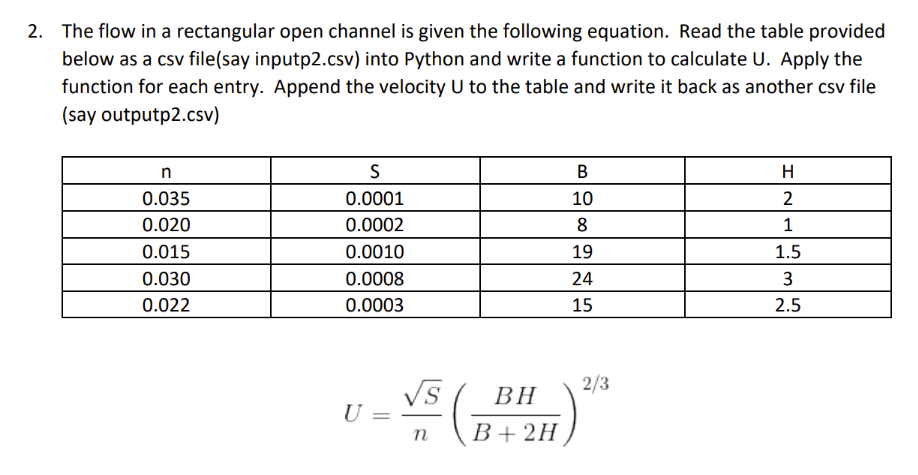

In [20]:
#Step 1:Load libraries 

import os 
import pandas as pd 


#Step 2:Set working directory 

os.chdir(r'C:\Users\rohan\OneDrive - Texas Tech University\Desktop\Machine Learning Class') 

 

#Step 3:Read the csv file 

a=pd.read_csv('input2.csv') 


#Calculate the last column values 

a['U'] = (((a['S']**0.5)/a['n'])*((a['B']*a['H'])/(a['B']+a['H']*2))**(2/3)) 
 
a['U']
#Export as csv file 

#a.to_csv("output2.csv") 

0    0.362410
1    0.609366
2    2.505283
3    1.690044
4    1.197123
Name: U, dtype: float64

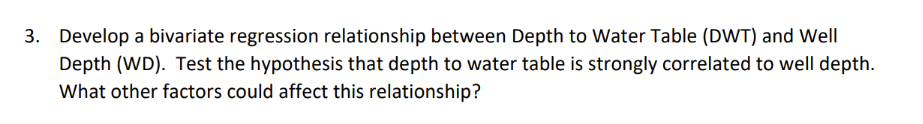

In [7]:
#Step 1: Load libraries 

import os 

import pandas as pd 

import statsmodels.api as sm 

 

#Step 2:Set working directory 

os.chdir(r'C:\Users\rohan\OneDrive - Texas Tech University\Desktop\Machine Learning Class') 

 

#Step 3:Read data from csv file and extract variables 

a = pd.read_csv('ogallaladata.csv') 

dwt = a['DWT'] 

wd= a['WellDepth'] 



#Step 4:Modelling 

dwt=sm.add_constant(dwt)#Add a constant for the intercept 

model = sm.OLS(wd,dwt)#Create the model 

res=model.fit()#Fit the values in the model to get predictions 

print(res.summary())#Write summary to the console 

 

#Step 5: Autocorrelation testing 

sm.stats.diagnostic.acorr_breusch_godfrey(res) 
 

                            OLS Regression Results                            
Dep. Variable:              WellDepth   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.22e-35
Time:                        12:19:14   Log-Likelihood:                -538.22
No. Observations:                 101   AIC:                             1080.
Df Residuals:                      99   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0984     10.004      6.607      0.0

(8.860098818435118, 0.545430294557858, 0.855816844525218, 0.5770371193765447)

Outputs from linear regression: 

For the relation, dwt = a + b(wd)  

a = 66.09 

b = 1.06 

Important properties: 

R-squared = 0.788 (78.8% of the variability of the dataset explained) 

Prob (f-stat) = <0.05 (indicates at least one of the parameters is significant) 

P value of a = <0.05 (significant) 

P value of b = <0.05 (significant) 

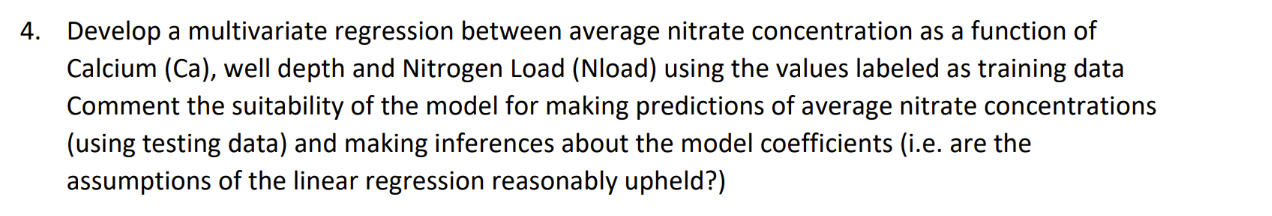

In [17]:
#load libraries 

import os 

import numpy as np 

import pandas as pd 

import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor 


#Step 2:Set working directory 

os.chdir(r'C:\Users\rohan\OneDrive - Texas Tech University\Desktop\Machine Learning Class') 

 
#Input read file 

a = pd.read_csv('Ogallaladata.csv') 

 

#Extract variables 

Ytrain = a.loc[a['Train']=='Training',['NO3Av']] 

Xtrain = a.loc[a['Train']=='Training',['Ca','WellDepth','Nload']] 

Ytest = a.loc[a['Train']=='Testing',['NO3Av']] 

ytest = Ytest['NO3Av'] 

Xtest = a.loc[a['Train']=='Testing',['Ca','WellDepth','Nload']] 

 

 

#Perform regression 

Xtrain = sm.add_constant(Xtrain) 

model = sm.OLS(Ytrain, Xtrain) 

res = model.fit() 

print(res.summary()) 

 
 #Get the predicted values of test data 
Xtest = sm.add_constant(Xtest) 

Ypred = res.predict(Xtest) 

err=ytest - Ypred 



# Autocorrelation testing 

sm.stats.diagnostic.acorr_breusch_godfrey(res) 

 
# Compute Variance Inflation Factors 

vif = pd.DataFrame() 

vif["VIF Factor"] = [variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])] 

vif["features"] = Xtrain.columns 

vif 


#Breusch Pagan Test for homoskedasticity 

#BP = sm.stats.diagnostic.het_breuschpagan(err,ytest) 

                            OLS Regression Results                            
Dep. Variable:                  NO3Av   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     18.28
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.82e-09
Time:                        12:31:13   Log-Likelihood:                -362.75
No. Observations:                  75   AIC:                             733.5
Df Residuals:                      71   BIC:                             742.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0360     16.301      0.738      0.4

,VIF Factor,features
0,20.281398,const
1,1.518987,Ca
2,1.561438,WellDepth
3,1.140035,Nload


Coefficients- 

Constant= 12.03 

Ca= 0.3426 

Well Depth=-0.116 

Nload=2.52 

 

Important Properties: 

R-squared = 0.43 (43% of the variability of the dataset explained) 

Prob (f-stat) = <0.05 (indicates at least one of the parameters is significant) 

P value of constant = 0.463(>0.05) (not significant) 

P value of ‘Ca’ = <0.05 (significant) 

P value of ‘Well Depth’ = <0.05 (significant) 

P value of ‘Nload’ = <0.05 (significant 

 

Autocorrelation Test: 

P value is 0.55 (i.e. >0.05) which rejects the null hypothesis that there is serial correlation.  

Multicollinearity test: 

VIF: 

Ca= 1.82 

Well Depth=4.48 

Nload=5.14 

 

There is not much multicollinearity in the model considering the low VIF values. (Considering 8 as a rule of thumb to exclude variables) 



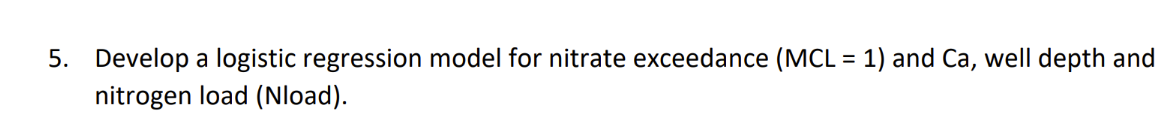


In [21]:
#Load libraries 

import os 

import pandas as pd 

import numpy as np 

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 

from matplotlib import pyplot as plt 

 

#Step 2:Set working directory 

os.chdir(r'C:\Users\rohan\OneDrive - Texas Tech University\Desktop\Machine Learning Class') 

 

# Read the datset 

a = pd.read_csv('Ogallaladata.csv')# read the given dataset 

features = ['WellDepth','Nload','Ca'] 

X = a[features]  # Extract the independent variables data 

Y = a['MCL'] # Extract the depedent variable data 

 

# Split into training and testing dataset 

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)    

 

#instantiate the model object (using default parameters) 

logreg = LogisticRegression(C=10**9) 

 

#fit the model with the data 

logreg.fit(xtrain,ytrain) 

 

#Fit the model to the testing data 

ypred=logreg.predict(xtest) #fit testing data 

yprob=logreg.predict_proba(xtest) 

z = pd.DataFrame(yprob) 

#z.to_csv('probs.csv') 

 

#Get the parameters 

print(logreg.get_params())

print(logreg.coef_) 

print(logreg.intercept_)

 

#Create a confusion matrix 

con_matrix = metrics.confusion_matrix(ytest, ypred) 

print(con_matrix) 

 

#Evaluate using accuracy,precision,recall 

print("Accuracy:",metrics.accuracy_score(ytest,ypred))#overall 

print("Precision:",metrics.precision_score(ytest,ypred))#predicting 0's 

print("Recall:",metrics.recall_score(ytest,ypred))#predicting 1's 

 


{'C': 1000000000, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[-0.00688666  0.15217449  0.02398077]]
[-0.67565711]
[[ 7  5]
 [ 5 14]]
Accuracy: 0.6774193548387096
Precision: 0.7368421052631579
Recall: 0.7368421052631579


Logistic regression model: 

Coefficients- 

Well depth =  -0.00688666   

Nload = 0.15217449   

Ca = 0.02398077 

Intercept = -0.67565711

 

Overall accuracy of model = 0.67 

Accuracy for predicting MCL(1)= 0.73 